<a href="https://colab.research.google.com/github/boyercb/bst263-final-project/blob/master/BST_263_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from joblib import dump, load

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, l1_min_c
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

**Load data**

In [0]:
# currently the coding is 
# run cleaning code
# url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/mydata_unique.csv'
url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/'
mydata = pd.read_csv(url + "mydata_all.csv")

X_train = pd.read_csv(url + "X_train.csv")
X_test = pd.read_csv(url + "X_test.csv")

y_train = pd.read_csv(url + "y_train.csv", header=None)
y_test = pd.read_csv(url + "y_test.csv", header=None)

y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

**SKIP/COMMENT OUT THIS SECTION IF RUNNING AUGMENTED**

In [0]:
# create training and validation sets

# total column number
#cols = mydata.shape[1]
#col_image_end = cols-5
#col_label = cols-1

#train, test = train_test_split(mydata, test_size=0.20, random_state=42)

#X_train, y_train = train.iloc[:, 0:col_image_end], train.iloc[:, col_label]
#X_test, y_test = test.iloc[:, 0:col_image_end], test.iloc[:, col_label]



**Image pre-processing**

In [0]:
# preprocessing 
scaler = StandardScaler().fit(X_train)
X_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# constants
n_folds = 10
seed = 3370

model_names = ["SVM RBF", "Logistic", "Random Forest", "LDA", "QDA", "XGBoost", "Naive Bayes", "Ensemble"]
filenames = ["svm_rbf_aug", "logistic_aug", "rf_aug", "LDA_aug", "QDA_aug", "gb_aug", "bayes_aug", "ensemble_aug"]

# tuning parameters
svm_rbf_params = {
    'C': np.logspace(-4, 1, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_poly_params = {
    'C': np.logspace(-4, 1.5, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_sig_params = {
    'C': np.logspace(-4, 1, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_lin_params = {'C': np.logspace(-4, 0, 25)}

logit_params = {
    'C': np.logspace(-4, 0.5, 25), 
    'intercept_scaling': [100000],
    }

rf_params = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(1, 100, 11)],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 9, 10],
    'n_estimators': [int(x) for x in np.linspace(50, 1000, 5)]
}

gb_params = {
    'learning_rate': np.linspace(0.01, 0.1, num = 4),
    'max_depth': [1, 5, 10, 20, 40, 80, 100],
    'subsample': [0.8],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 5)]
}

**Model 1: SVM**
1. Use "rbf" kernel

In [4]:
# model: SVM - rbf
svc_rbf = SVC(kernel = "rbf", random_state=seed)
svm_rbf = GridSearchCV(
    svc_rbf, 
    svm_rbf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )
svm_rbf.fit = svm_rbf.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  9.7min finished


2. Use "poly" kernel


In [5]:
# model: SVM - poly kernel
svc_poly = SVC(kernel = "poly", random_state=seed)
svm_poly = GridSearchCV(
    svc_poly, 
    svm_poly_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
svm_poly.fit = svm_poly.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  9.0min finished


3. Use "sigmoid" kernel

In [6]:
# model: SVM - sigmoid kernel
svc_sig = SVC(kernel = "sigmoid", random_state=seed)
svm_sig = GridSearchCV(
    svc_sig, 
    svm_sig_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
svm_sig.fit = svm_sig.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  6.5min finished


4. Use "linear" kernel

In [7]:
# model: SVM - linear kernel
svc_lin = SVC(kernel = "linear", random_state=seed)
svm_lin = GridSearchCV(
    svc_lin, 
    svm_lin_params, 
    cv=n_folds, 
    scoring='accuracy', 
    verbose=2,
    n_jobs=-1)
svm_lin.fit = svm_lin.fit(X_std, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


5. Compare prediction AUCs across different kernels 

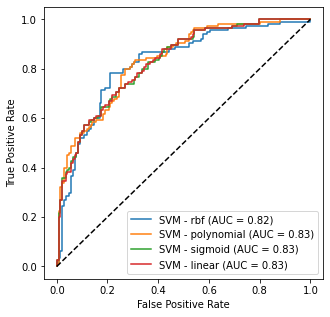

In [8]:
svm_models = [svm_rbf, svm_poly, svm_sig, svm_lin]
svm_names = ["SVM - rbf", "SVM - polynomial", "SVM - sigmoid", "SVM - linear"]

aucs_test = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(svm_models, svm_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_test_std, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 2: L1-logistic regression**

In [9]:
# model: L1-logistic regression
logit = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed)
logistic = GridSearchCV(
    logit, 
    logit_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )

logistic.fit = logistic.fit(X_std, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   21.9s finished


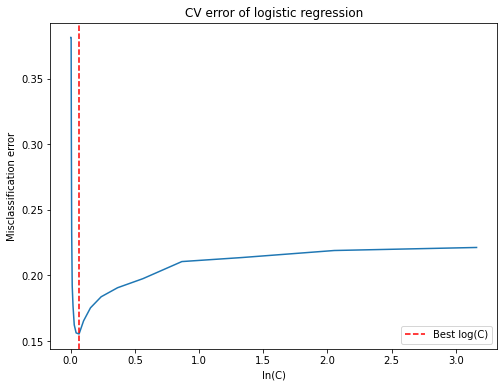

In [10]:
# plot CV errors
b = logistic.cv_results_['mean_test_score'].argmax()

plt.figure().set_size_inches(8, 6)
plt.plot(logit_params['C'],1 - logistic.cv_results_['mean_test_score'])
plt.axvline(logit_params['C'][b], linestyle='--', color='red', label='Best log(C)')
plt.ylabel('Misclassification error')
plt.xlabel('ln(C)')
plt.title('CV error of logistic regression')
plt.legend(loc='lower right')
plt.show()

**Model 3: Random forest**

In [0]:
# model: Random forest 
rf = RandomForestClassifier(random_state=seed)
rf = GridSearchCV(  
    estimator=rf, 
    param_grid=rf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,  
    n_jobs=-1
)
rf.fit = rf.fit(X_std, y_train)


Fitting 10 folds for each of 330 candidates, totalling 3300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.1min


**Model 4: LDA**
1. Create PCs to reduce dimensions

In [0]:
full_pca = PCA(random_state=0).fit(X_std)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df

2. Doing a grid search to find the optimal number of PCs that give the best prediction AUC

In [0]:
# for i in range(1, 300, 1):
#     final_pca = PCA(i, random_state=0).fit(X_std)
#     X_std_transform = final_pca.transform(X_std)
#     X_test_std_transform = final_pca.transform(X_test_std)

#     # LDA
#     LDA = LinearDiscriminantAnalysis()
#     LDA.fit=LDA.fit(X_std_transform, y_train)

#     y_pred = LDA.predict_proba(X_test_std_transform)[:,1]
#     auc_output = metrics.roc_auc_score(y_test, y_pred)
#     aucs_test.append(auc_output)

In [0]:
# aucs_test = []
# for i in range(1, 300, 1):
#     final_pca = PCA(i, random_state=0).fit(X_std)
#     X_std_transform = final_pca.transform(X_std)
#     X_test_std_transform = final_pca.transform(X_test_std)

#     # LDA
#     LDA = LinearDiscriminantAnalysis()
#     LDA.fit=LDA.fit(X_std_transform, y_train)

#     y_pred = LDA.predict_proba(X_test_std_transform)[:,1]
#     auc_output = metrics.roc_auc_score(y_test, y_pred)
#     aucs_test.append(auc_output)
# lda_npc = np.argmax(aucs_test)
# lda_pc = range(1, 300, 1)[lda_npc]
# print("LDA optimal number of clusters: " + str(lda_pc))
# print("LDA best AUC: " + str(aucs_test[lda_pc]))

LDA optimal number of clusters: 8
LDA best AUC: 0.8023214285714286


3. Re-fit LDA with optimal number of PCs



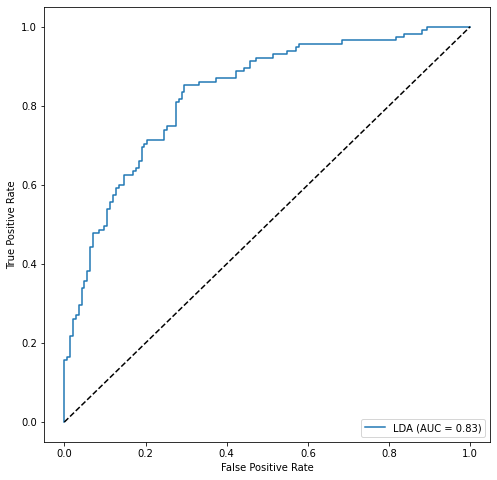

In [20]:
# model: LDA
lda_pca = PCA(153, random_state=0).fit(X_std)
X_std_lda = lda_pca.transform(X_std)
X_test_std_lda = lda_pca.transform(X_test_std)

LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_std_lda, y_train)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(LDA, X_test_std_lda, y_test, ax=ax, name="LDA")

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 5: QDA**

1. Doing a grid search to find the optimal number of PCs that give the best prediction AUC

In [0]:
# aucs_test = []
# for i in range(1, 230, 1):
#     final_pca = PCA(i, random_state=0).fit(X_std)
#     X_std_transform = final_pca.transform(X_std)
#     X_test_std_transform = final_pca.transform(X_test_std)

#     # QDA
#     QDA = QuadraticDiscriminantAnalysis()
#     QDA.fit = QDA.fit(X_std_transform, y_train)

#     y_pred = QDA.predict_proba(X_test_std_transform)[:,1]
#     auc_output = metrics.roc_auc_score(y_test, y_pred)
#     aucs_test.append(auc_output)
# qda_npc = np.argmax(aucs_test)
# qda_pc = range(1, 230, 1)[qda_npc]
# print("QDA optimal number of clusters: " + str(qda_pc))
# print("QDA best AUC: " + str(aucs_test[qda_pc]))

QDA optimal number of clusters: 32
QDA best AUC: 0.7980357142857142


2. Refit model with optimal number of clusters

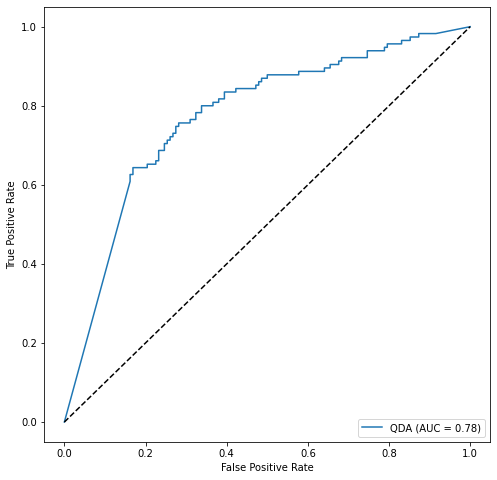

In [21]:
# model: QDA
qda_pca = PCA(153, random_state=0).fit(X_std)
X_std_qda = qda_pca.transform(X_std)
X_test_std_qda = qda_pca.transform(X_test_std)

QDA = QuadraticDiscriminantAnalysis()
QDA=QDA.fit(X_std_lda, y_train)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(QDA, X_test_std_lda, y_test, ax=ax, name="QDA")

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 6: XGBoost**

In [0]:
# model: XGBoost
gb = GradientBoostingClassifier(random_state=seed) 
gb = GridSearchCV(
    estimator=gb, 
    param_grid=gb_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2, 
    n_jobs=-1
)
gb.fit = gb.fit(X_std, y_train)

**Model 7: Naive Bayes**

In [0]:
# model: Naive Bayes
bayes = GaussianNB()
bayes.fit(X_std, y_train)

**Model 8: Voting Ensemble Classifier**

In [0]:
# model: Ensemble
models = [
          ("Logistic",logistic.best_estimator_),
          ("Random Forest",rf.best_estimator_),
          ("XGBoost",gb.best_estimator_),
          ("Naive Bayes",bayes)]

ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_std, y_train)

**Save trained models**

In [0]:
for mod in zip(models, filenames):
  dump(mod[0], mod[1])

**Load trained models (START HERE)**

In [0]:
svm_rbf = load('svm_rbf')
logistic = load('logistic')
rf = load('rf')
LDA = load('LDA')
QDA = load('QDA')
gb = load('gb')
bayes = load('bayes')
ensemble = load('ensemble')

FileNotFoundError: ignored

**Model evaluation and comparison**

In [0]:
y_train_pred_svm_lin = svm_lin.fit.predict(X_std)
y_train_pred_logistic = logistic.fit.predict(X_std)
y_train_pred_rf = rf.fit.predict(X_std)
y_train_pred_lda = LDA.fit.predict(X_std)
y_train_pred_qda = QDA.fit.predict(X_std)
y_train_pred_xgb = gb.fit.predict(X_std)
y_train_pred_bayes = bayes.fit.predict(X_std)
y_train_pred_ensemble = ensemble.fit.predict(X_std)


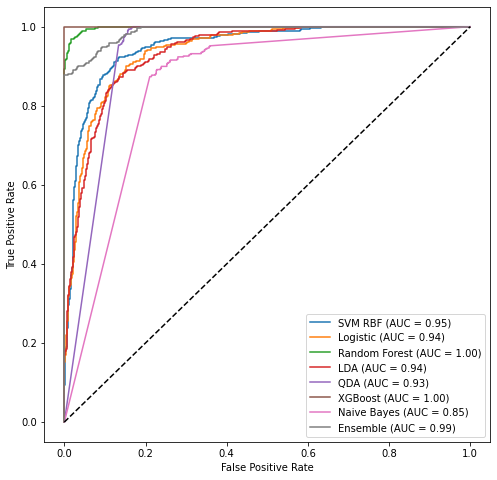

In [29]:
models = [svm_lin, logistic, rf, LDA, QDA, gb, bayes, ensemble]

aucs_train = []
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(models, model_names): 
    if mod[1] == "LDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_std_lda, y_train, 
                                        ax=ax, name=mod[1])
    elif mod[1] == "QDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_std_qda, y_train, 
                                        ax=ax, name=mod[1])
    else:
      roc_output = metrics.plot_roc_curve(mod[0], X_std, y_train, 
                                        ax=ax, name=mod[1])
    aucs_train.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [0]:
y_test_pred_svm_lin = svm_lin.fit.predict(X_test_std)
y_test_pred_logistic = logistic.fit.predict(X_test_std)
y_test_pred_rf = rf.fit.predict(X_test_std)
y_test_pred_lda = LDA.predict(X_test_std_lda)
y_test_pred_qda = QDA.predict(X_test_std_qda)
y_test_pred_xgb = gb.fit.predict(X_test_std)
y_test_pred_ensemble = ensemble.predict(X_test_std)

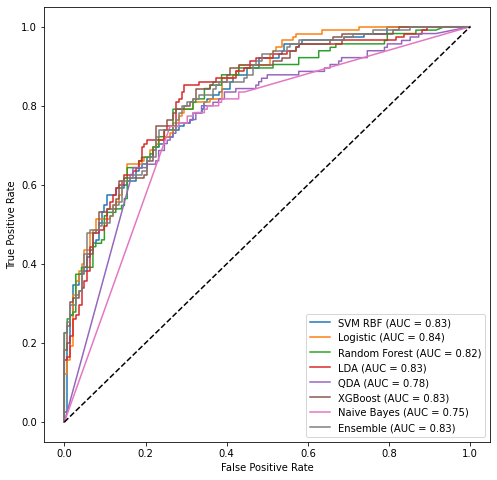

In [30]:

aucs_test = []
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(models, model_names): 
    if mod[1] == "LDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_test_std_lda, y_test, 
                                        ax=ax, name=mod[1])
    elif mod[1] == "QDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_test_std_qda, y_test, 
                                        ax=ax, name=mod[1])
    else:
      roc_output = metrics.plot_roc_curve(mod[0], X_test_std, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()


In [35]:
pd.DataFrame(np.vstack([aucs_train, aucs_test]), 
             index=["Training AUC", "Test AUC"], 
             columns=model_names)

,SVM RBF,Logistic,Random Forest,LDA,QDA,XGBoost,Naive Bayes,Ensemble
Training AUC,0.949722,0.939125,0.997915,0.935119,0.929274,1.000000,0.853565,0.988399
Test AUC,0.826699,0.836558,0.820912,0.830557,0.775015,0.833252,0.752633,0.831660


**Clustering/Data reduction**

Variance Explained,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50
Number of PCs Needed,238,153,104,70,46,29,17,9,5,3


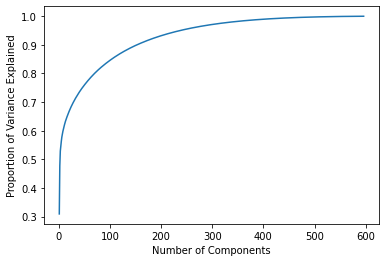

In [0]:
# Generate PCAR
from sklearn.decomposition import PCA
full_pca = PCA(random_state=0).fit(X_std)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df


In [0]:
# model: KMeans
final_pca = PCA(165, random_state=0).fit(X_train)
pixels_transform = final_pca.transform(X_train)

kmeans_kpp = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0).fit(pixels_transform)
kmeans_kpp_labels = kmeans_kpp.labels_

In [0]:
# model: EM
em_kmeans = GaussianMixture(n_components=2, init_params='kmeans', n_init=1, random_state=0).fit(pixels_transform)
em_kmeans_labels = em_kmeans.predict(pixels_transform)

In [0]:
svm_pca_rbf = GridSearchCV(
    svc_rbf, 
    svm_rbf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )
svm_pca_rbf.fit = svm_rbf.fit(pixels_transform, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   12.3s finished


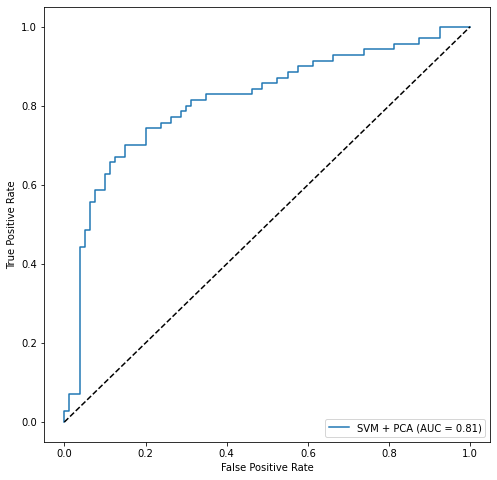

In [0]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(svm_rbf, final_pca.transform(X_test), y_test, 
                                        ax=ax, name="SVM + PCA")
ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Data Augmentation**

In [34]:
metrics.accuracy_score(y_test, y_test_pred_ensemble)

0.7392996108949417